### Description


### Dependencies

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelBinarizer
import re
from matplotlib import pyplot as plt

### Cleaning data

In [3]:
dataset = pd.read_csv("../data/reviews.csv")

dataset = dataset[["Score","Summary","Text"]]

new_col = pd.DataFrame()


def map_to_category(value):
    if value <=2:
        return "negative"
    elif value == 3:
        return "neutral"
    
    elif value >=4:
        return "positive"
    else:
        return "unknown"
    
dataset["Score"] = dataset["Score"].apply(map_to_category)

balanced_data = pd.DataFrame()

if all(dataset["Score"].value_counts()>= 10000):

    for score in ["negative","positive","neutral"]:
        score_df = dataset[dataset["Score"]== score].sample(n=2000,random_state=1)
        balanced_data = pd.concat([balanced_data,score_df])
        

    rest_data = dataset.drop(balanced_data.index).reset_index(drop=True)

    balanced_data.reset_index(drop=True,inplace=True)


balanced_data.head(20)

Score                                            Summary  \
0   negative                             my cats wont eat these   
1   negative                        do not buy from these folks   
2   negative              my small dogs cant eat these too hard   
3   negative                                     not that great   
4   negative                               poor quality control   
5   negative                                       bitter taste   
6   negative       was suppose to have in package but only had    
7   negative                                         disgusting   
8   negative                                    it wasnt for me   
9   negative                               dont see the purpose   
10  negative                          good coffee bad packaging   
11  negative                                             bitter   
12  negative                                                yuk   
13  negative                   cocoa good product packing awful   
14  negative         healthy but not really tasty and expensive   
15  negative                                    not as pictured   
16  negative                    mostly high fructose corn syrup   
17  negative                                                adt   
18  negative               convenient package but exactly halva   
19  negative  tastes good salt is way too coarse to stick to...   

                                                 Text  
0   my cats who will literally eat anything wont e...  
1   the product description says oz which is oz i ...  
2   i have a toothless yorkie who can make a kentu...  
3   i am a a vegetarian and this is my least favor...  
4   ive ordered these before and was quite pleased...  
5   first let me say i am a huge fan of endangered...  
6   i sent this as a christmas gift when it arrive...  
7   i agree with the other reviewer i bought this ...  
8   i ended up giving this tea to my mom ive found...  
9   im not a body builder but i am very into nutri...  
10  my husband loves the coffee but this is the on...  
11  to me this coffee was extremely bitter i dumpe...  
12  i hated this kcup and couldnt wait to be done ...  
13  this powder is actually very good and this wou...  
14  i think the product description didnt warn me ...  
15  onions were much more finely chopped than indi...  
16  no fear super energy is mostly made up of high...  
17  once again confusing profiteering with prophet...  
18  i wish al wadi would package their halva in ba...  
19  admittedly i have only tried one flavor so far...

Score
negative     82037
neutral      42640
positive    443777
Name: count, dtype: int64


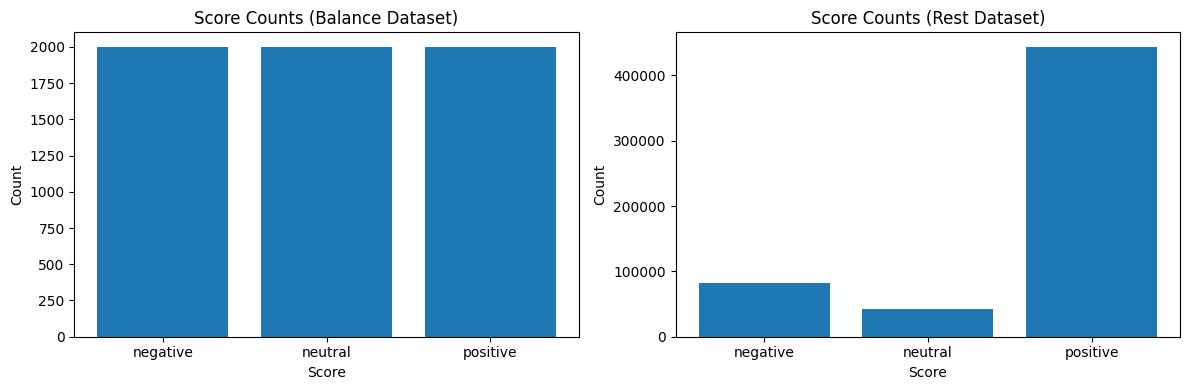

In [5]:
# Count the number of scores for each class in both datasets
score_counts = balanced_data['Score'].value_counts().sort_index()
score_counts2 = rest_data['Score'].value_counts().sort_index()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot the first bar chart in the first subplot
ax1.bar(score_counts.index, score_counts.values)
ax1.set_xlabel("Score")
ax1.set_ylabel("Count")
ax1.set_title("Score Counts (Balance Dataset)")

# Plot the second bar chart in the second subplot
ax2.bar(score_counts2.index, score_counts2.values)
ax2.set_xlabel("Score")
ax2.set_ylabel("Count")
ax2.set_title("Score Counts (Rest Dataset)")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [4]:
def text_clean(text):
    text = text.str.lower()
    text = text.replace(r"<.*>|[^a-zA-Z0-9\s]","",regex=True)
    text = text.replace(r'\d+\S*',"",regex=True)
    text = text.replace(r"\s+", " ",regex=True)
    return text


balanced_data["Summary"] = text_clean(balanced_data["Summary"])
balanced_data["Text"] = text_clean(balanced_data["Text"])
rest_data["Summary"] = text_clean(rest_data["Summary"])
rest_data["Text"] = text_clean(rest_data["Text"])


dataset.to_csv('reviews.csv', index=False)


# balanced_data.head(20)

In [6]:
train_x, test_x, train_y, test_y = train_test_split(balanced_data["Text"],balanced_data["Score"],test_size=0.2,random_state=8)

In [9]:
cnt_vec = CountVectorizer(stop_words="english")
train_x = train_x.fillna('')
test_x = test_x.fillna('')
test_y = test_y.fillna('')
train_y = train_y.fillna('')

#BOW = Bag Of Words
BOW_train = cnt_vec.fit_transform(train_x).toarray()
BOW_train_Df = pd.DataFrame(BOW_train,columns=cnt_vec.get_feature_names_out())
BOW_train_Df.head(20)


BOW_train_Df[:4]

aaiacute  abandon  abandoned  abc  abdomen  abilities  ability  able  \
0         0        0          0    0        0          0        0     0   
1         0        0          0    0        0          0        0     0   
2         0        0          0    0        0          0        0     0   
3         0        0          0    0        0          0        0     0   

   abnormal  abnormally  ...  zipper  ziti  ziwipeak  zoe  zola  zombie  zone  \
0         0           0  ...       0     0         0    0     0       0     0   
1         0           0  ...       0     0         0    0     0       0     0   
2         0           0  ...       0     0         0    0     0       0     0   
3         0           0  ...       0     0         0    0     0       0     0   

   zot  zucchini  zukes  
0    0         0      0  
1    0         0      0  
2    0         0      0  
3    0         0      0  

[4 rows x 14766 columns]

In [10]:
BOW_test = cnt_vec.transform(test_x).toarray()
BOW_test_Df = pd.DataFrame(BOW_test,columns = cnt_vec.get_feature_names_out())
BOW_test_Df[:4]


aaiacute  abandon  abandoned  abc  abdomen  abilities  ability  able  \
0         0        0          0    0        0          0        0     0   
1         0        0          0    0        0          0        0     0   
2         0        0          0    0        0          0        0     0   
3         0        0          0    0        0          0        0     0   

   abnormal  abnormally  ...  zipper  ziti  ziwipeak  zoe  zola  zombie  zone  \
0         0           0  ...       0     0         0    0     0       0     0   
1         0           0  ...       0     0         0    0     0       0     0   
2         0           0  ...       0     0         0    0     0       0     0   
3         0           0  ...       0     0         0    0     0       0     0   

   zot  zucchini  zukes  
0    0         0      0  
1    0         0      0  
2    0         0      0  
3    0         0      0  

[4 rows x 14766 columns]

In [11]:
BOW_test_Df["Score"] = test_y.reset_index()["Score"]
BOW_train_Df["Score"] = train_y.reset_index()["Score"]

In [12]:
filtered_df = balanced_data[balanced_data['Text'].str.contains('count', na=False)]
pd.set_option('display.max_colwidth', None)

filtered_df.head()

Score                                                       Summary  \
67   negative  research product before purchasing debilitating side effects   
108  negative                   dollars for a count of mastro lorenzo tdisc   
127  negative                                               wheres the head   
258  negative                                             very disappointed   
317  negative                                            took it for months   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Text  
67                                                                                                                            people taking this product should be well aware of its side effects this product left me with horrible dizziness that lasted well over hours i also had the worst headache of my life while consuming this coffee i consider myself a healthy young man i workout times a week run and live a pretty athletic lifestyle this product literally had me down for the count from my normal activities for about one week before taking this product please consult your physician and discuss the potential side effects as it relates to your current health while reviewing any changes to my diet or reactions to any medications the only change was adding this product to my diet once i eliminated this coffee from my diet the headaches and dizziness subsided however the product still remains in your system for quite some time as i still experience slight bouts of dizziness during the first few minutes of my day  
108                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            is that the correct price dollars for a count of t disc when they cost normally are you serious  
127  you reckon when the ad says whole rabbit you ought get the whole rabbit i aint got a head on this critter my neighbor kids sure love playin with them rabbit heads if i aint got a rabbit head fer makin peace with them neighbor kids they prolly gonna come bust up my old ridin tractor without my tractor i cant even get up the corner store for no beer another thing is i aint even got any intestines fer sausage makin how is easter dinner gonna be any goo

In [13]:
#for each score count the frequency of each word
cons_df = BOW_train_Df.groupby("Score",as_index=False).sum().reset_index(drop=True)
#count the frequencies of each score

category_count_df = BOW_train_Df["Score"].value_counts().reset_index()
category_count_df.columns = ["Score", "Score_Count"]


cons_df = pd.merge(cons_df,category_count_df,on="Score",how="left")

cons_df["sum_all_words"] = cons_df.drop(["Score","Score_Count"],axis=1).sum(axis=1)

cons_df.head(10)

Score  aaiacute  abandon  abandoned  abc  abdomen  abilities  ability  \
0  negative         1        1          1    1        1          0        0   
1   neutral         0        0          0    0        0          0        2   
2  positive         0        0          0    0        0          1        0   

   able  abnormal  ...  ziwipeak  zoe  zola  zombie  zone  zot  zucchini  \
0    30         1  ...         0    0     0       0     4    1         1   
1    35         0  ...         0    2     0       1     1    0         1   
2    45         0  ...         2    1     2       0     0    0         1   

   zukes  Score_Count  sum_all_words  
0      3         1604          50359  
1      5         1611          51123  
2      5         1585          44910  

[3 rows x 14769 columns]

In [14]:
alpha = 1
prob_table = pd.DataFrame()

prob_table["Score"] = cons_df["Score"]
prob_table["P_S"] = np.log(cons_df["Score_Count"] / cons_df["Score_Count"].sum())

# Vectorized operation for probability calculations
cols = cons_df.columns.difference(["Score_Count", "Score", "sum_all_words"])
sum_all_words_adjusted = cons_df["sum_all_words"] + (alpha * len(cols))

# Use apply along the axis=1 to ensure correct broadcasting
prob_table[cols] = np.log((cons_df[cols].add(alpha)).div(sum_all_words_adjusted, axis=0))

prob_table.head()


C:\Users\aleja\AppData\Local\Temp\ipykernel_25156\1277165073.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prob_table[cols] = np.log((cons_df[cols].add(alpha)).div(sum_all_words_adjusted, axis=0))
C:\Users\aleja\AppData\Local\Temp\ipykernel_25156\1277165073.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prob_table[cols] = np.log((cons_df[cols].add(alpha)).div(sum_all_words_adjusted, axis=0))
C:\Users\aleja\AppData\Local\Temp\ipykernel_25156\1277165073.py:12: PerformanceWarning: DataFrame is highly fragmented.  This 

Score       P_S   aaiacute    abandon  abandoned        abc    abdomen  \
0  negative -1.096115 -10.390917 -10.390917 -10.390917 -10.390917 -10.390917   
1   neutral -1.091761 -11.095727 -11.095727 -11.095727 -11.095727 -11.095727   
2  positive -1.108032 -10.996685 -10.996685 -10.996685 -10.996685 -10.996685   

   abilities    ability      able  ...     zipper       ziti   ziwipeak  \
0 -11.084064 -11.084064 -7.650077  ... -11.084064 -10.390917 -11.084064   
1 -11.095727  -9.997114 -7.512208  ... -11.095727 -11.095727 -11.095727   
2 -10.303538 -10.996685 -7.168044  ... -10.303538 -10.996685  -9.898073   

         zoe       zola     zombie       zone        zot   zucchini     zukes  
0 -11.084064 -11.084064 -11.084064  -9.474626 -10.390917 -10.390917 -9.697769  
1  -9.997114 -11.095727 -10.402580 -10.402580 -11.095727 -10.402580 -9.303967  
2 -10.303538  -9.898073 -10.996685 -10.996685 -10.996685 -10.303538 -9.204926  

[3 rows x 14768 columns]

In [16]:
train_array = prob_table.drop(["Score","P_S"],axis=1)
train_array = np.array(train_array)

predict_df = pd.DataFrame(np.dot(BOW_test,train_array.T) + np.array(prob_table["P_S"]),columns=["negative","neutral","positive"])

predict_df["final_category"] = predict_df.idxmax(axis=1)
predict_df["original_category"] = BOW_test_Df["Score"]
predict_df.head(20)


negative     neutral    positive final_category original_category
0  -130.806363 -125.753484 -124.613721       positive          positive
1  -121.092282 -121.289150 -116.442100       positive          positive
2  -321.964916 -312.678983 -307.769815       positive          positive
3  -163.672258 -166.410180 -165.375983       negative           neutral
4  -108.516254 -110.220855 -110.506194       negative          negative
5   -90.338319  -88.180969  -84.436403       positive          positive
6   -81.534091  -81.200177  -80.840048       positive           neutral
7  -175.873943 -172.304935 -166.374574       positive          positive
8  -150.169659 -148.379342 -153.480182        neutral          positive
9  -209.684503 -216.849439 -232.430676       negative          negative
10 -156.598350 -157.070807 -160.433599       negative          negative
11  -57.350647  -58.632173  -60.615135       negative          negative
12  -75.508761  -79.241429  -82.004838       negative          negative
13 -360.660465 -371.486757 -375.128349       negative          negative
14 -490.477984 -474.934658 -487.287541        neutral           neutral
15 -168.081668 -160.422201 -164.695335        neutral           neutral
16  -96.233071  -94.526959  -91.473436       positive          positive
17  -77.438985  -75.606766  -71.624821       positive          positive
18 -310.840628 -301.494440 -308.896243        neutral           neutral
19 -294.436006 -289.126630 -292.452412        neutral          negative

In [17]:
cross_tab_df=pd.crosstab(predict_df["final_category"], predict_df["original_category"] )
print(cross_tab_df)
print(np.trace(cross_tab_df)/cross_tab_df.values.sum())

original_category  negative  neutral  positive
final_category                                
negative                236       92        41
neutral                 138      240       118
positive                 22       57       256
0.61
